# **좌석 시야각 구하기**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable


rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

plt.rcParams['axes.unicode_minus'] = False
sns.set(rc=rc)

In [2]:
seat_information = pd.read_csv("C:/Users/whileduck/Desktop/Github/Concert-Hall-Price-Model/data/seat_information.csv", encoding = 'euc-kr')

In [3]:
coordinate = np.array(seat_information[['X','Y','Z']])

coordinate

array([[ 1451,   542,   -93],
       [ 1406,   555,   -93],
       [ 1361,   568,   -93],
       ...,
       [-1454,   617,   428],
       [-1522,   677,   483],
       [-1568,   624,   483]], dtype=int64)

# **좌우 상하 시야각 구하기**

$Cos \theta = \frac{X\cdot Y}{|X| \cdot |Y|}$

In [4]:
horizinal_angles = []

left_stage = np.array([9074.9836, 3186.2702, 0]) / 10
right_stage = np.array([-9074.9836, 3186.2702, 0]) / 10

for point in coordinate:
    
    left_vector = left_stage - point
    right_vector = right_stage - point
    
    left_distance = np.linalg.norm(left_vector)
    right_distance = np.linalg.norm(right_vector)
    
    dot_product = np.dot(left_vector, right_vector.T)
    
    if left_distance == 0.0 or right_distance == 0.0:
        angle = 0.0  
    else:
        cos = np.clip(dot_product / (left_distance * right_distance), -1.0, 1.0)
        radian = np.arccos(cos)
        degree = np.degrees(radian)
        horizinal_angles.append(degree)

In [5]:
vertical_angles = []

upper_stage = np.array([5422.5990, 8000.000, 0]) / 10
lower_stage = np.array([5422.5990, -8000.000, 0]) / 10

for point in coordinate:
    
    upper_vector = upper_stage - point
    lower_vector = lower_stage - point
    
    left_distance = np.linalg.norm(upper_vector)
    right_distance = np.linalg.norm(lower_vector)
    
    dot_product = np.dot(upper_vector, lower_vector.T)
    
    if left_distance == 0.0 or right_distance == 0.0:
        angle = 0.0  
    else:
        cos = np.clip(dot_product / (left_distance * right_distance), -1.0, 1.0)
        radian = np.arccos(cos)
        degree = np.degrees(radian)
        vertical_angles.append(degree)


In [6]:
seat_information['좌우시야각'] = horizinal_angles
seat_information['상하시야각'] = vertical_angles

In [7]:
seat_information.head()

,Unnamed: 0,층,블록,열,넘버,전체_좌석,X,Y,Z,좌우시야각,상하시야각
0,0,1층,A블록,1,1,1층 A블록1열 1,1451,542,-93,18.140477,71.528762
1,1,1층,A블록,1,2,1층 A블록1열 2,1406,555,-93,20.735313,73.084332
2,2,1층,A블록,1,3,1층 A블록1열 3,1361,568,-93,23.716134,74.662295
3,3,1층,A블록,1,4,1층 A블록1열 4,1315,580,-93,27.131671,76.360670
4,4,1층,A블록,1,5,1층 A블록1열 5,1270,591,-93,30.918770,78.092245


In [18]:
def seat_angle_visualization(coordinate, seat):
        
        global seat_information
        
        # 무대 좌표들 
        
        left_stage = np.array([9074.9836, 3186.2702, 0]) / 10
        right_stage = np.array([-9074.9836, 3186.2702, 0]) / 10
        upper_stage = np.array([5422.5990, 8000.000, 0]) / 10
        lower_stage = np.array([5422.5990, -8000.000, 0]) / 10

        fig,ax = plt.subplots(figsize = (30,10), subplot_kw = {'projection':'3d'}, ncols = 2)
        
        # 전체 좌석 좌표 찍기
        ax[0].scatter(data = coordinate,
                xs = 'X',
                ys = 'Y',
                zs = 'Z',
                c = 'blue',
                alpha = 0.05)
        
        ax[1].scatter(data = coordinate,
                xs = 'X',
                ys = 'Y',
                zs = 'Z',
                c = 'blue',
                alpha = 0.05)
        
        cond = coordinate['전체_좌석'] == seat
        current_location = np.array(coordinate[cond][['X','Y','Z']])[0]
        
        
        # seat 좌석 찍기
        ax[0].scatter(
                xs = current_location[0],
                ys = current_location[1],
                zs = current_location[2],
                c = 'red',
                s = 50,
                label = '현재 위치')
        
        ax[1].scatter(
                xs = current_location[0],
                ys = current_location[1],
                zs = current_location[2],
                c = 'red',
                s = 50,
                label = '현재 위치')
                
        
        # 좌우 point 좌표 찍고 벡터 표시
        
        for i,horizinal_point in enumerate([left_stage, right_stage]):
                point_label = vector_label = None
                
                if i == 1:
                        point_label = '좌우 포인트'
                        vector_label = '좌우 시야각'
                ax[0].scatter(
                        xs = horizinal_point[0],
                        ys = horizinal_point[1],
                        zs = horizinal_point[2],
                        c = 'green',
                        label = point_label
                )
                
                target_vector = horizinal_point - current_location
                
                ax[0].quiver(current_location[0],current_location[1],current_location[2],
                                target_vector[0],target_vector[1],target_vector[2],
                                color = 'green',
                                label = vector_label)
                
                ax[1].scatter(
                        xs = horizinal_point[0],
                        ys = horizinal_point[1],
                        zs = horizinal_point[2],
                        c = 'green',
                        label = point_label
                )
                
                target_vector = horizinal_point - current_location
                
                ax[1].quiver(current_location[0],current_location[1],current_location[2],
                                target_vector[0],target_vector[1],target_vector[2],
                                color = 'green',
                                label = vector_label)
                
        # 상하 point 좌표 찍기
        
        for i,vertical_point in enumerate([upper_stage, lower_stage]):
                
                point_label = vector_label = None
                
                if i == 1:
                        point_label = '상하 포인트'
                        vector_label = '상하 시야각'
                ax[0].scatter(
                        xs = vertical_point[0],
                        ys = vertical_point[1],
                        zs = vertical_point[2],
                        c = 'orange',
                        label = point_label
                )
                
                target_vector = vertical_point - current_location
                
                if i == 1:
                        label = '상하 시야각'
                
                ax[0].quiver(current_location[0],current_location[1],current_location[2],
                                target_vector[0],target_vector[1],target_vector[2],
                                color = 'orange',
                                label = vector_label)
                
                
                ax[1].scatter(
                        xs = vertical_point[0],
                        ys = vertical_point[1],
                        zs = vertical_point[2],
                        c = 'orange',
                        label = point_label
                )
                
                target_vector = vertical_point - current_location
                
                if i == 1:
                        label = '상하 시야각'
                
                ax[1].quiver(current_location[0],current_location[1],current_location[2],
                                target_vector[0],target_vector[1],target_vector[2],
                                color = 'orange',
                                label = vector_label)
                
        horizinal_angles = round(seat_information[cond]['좌우시야각'].values[0],2)
        vertical_angles = round(seat_information[cond]['상하시야각'].values[0],2)
        
        for i in [0,1]:
                ax[i].set_box_aspect([3,3,1])
                ax[i].set_xlabel('X')
                ax[i].set_ylabel('Y')
                ax[i].set_zlabel('Z')
                ax[i].legend(loc = 'upper right')
        ax[0].view_init(15,20)
        ax[1].view_init(60,15)
        
        fig.suptitle(f'좌석 : {seat} \n 좌우시야각 : {horizinal_angles} \n 상하시야각 : {vertical_angles}', fontsize = 20)
        

In [50]:
example_seat_list = seat_information.sample(5)['전체_좌석'].values

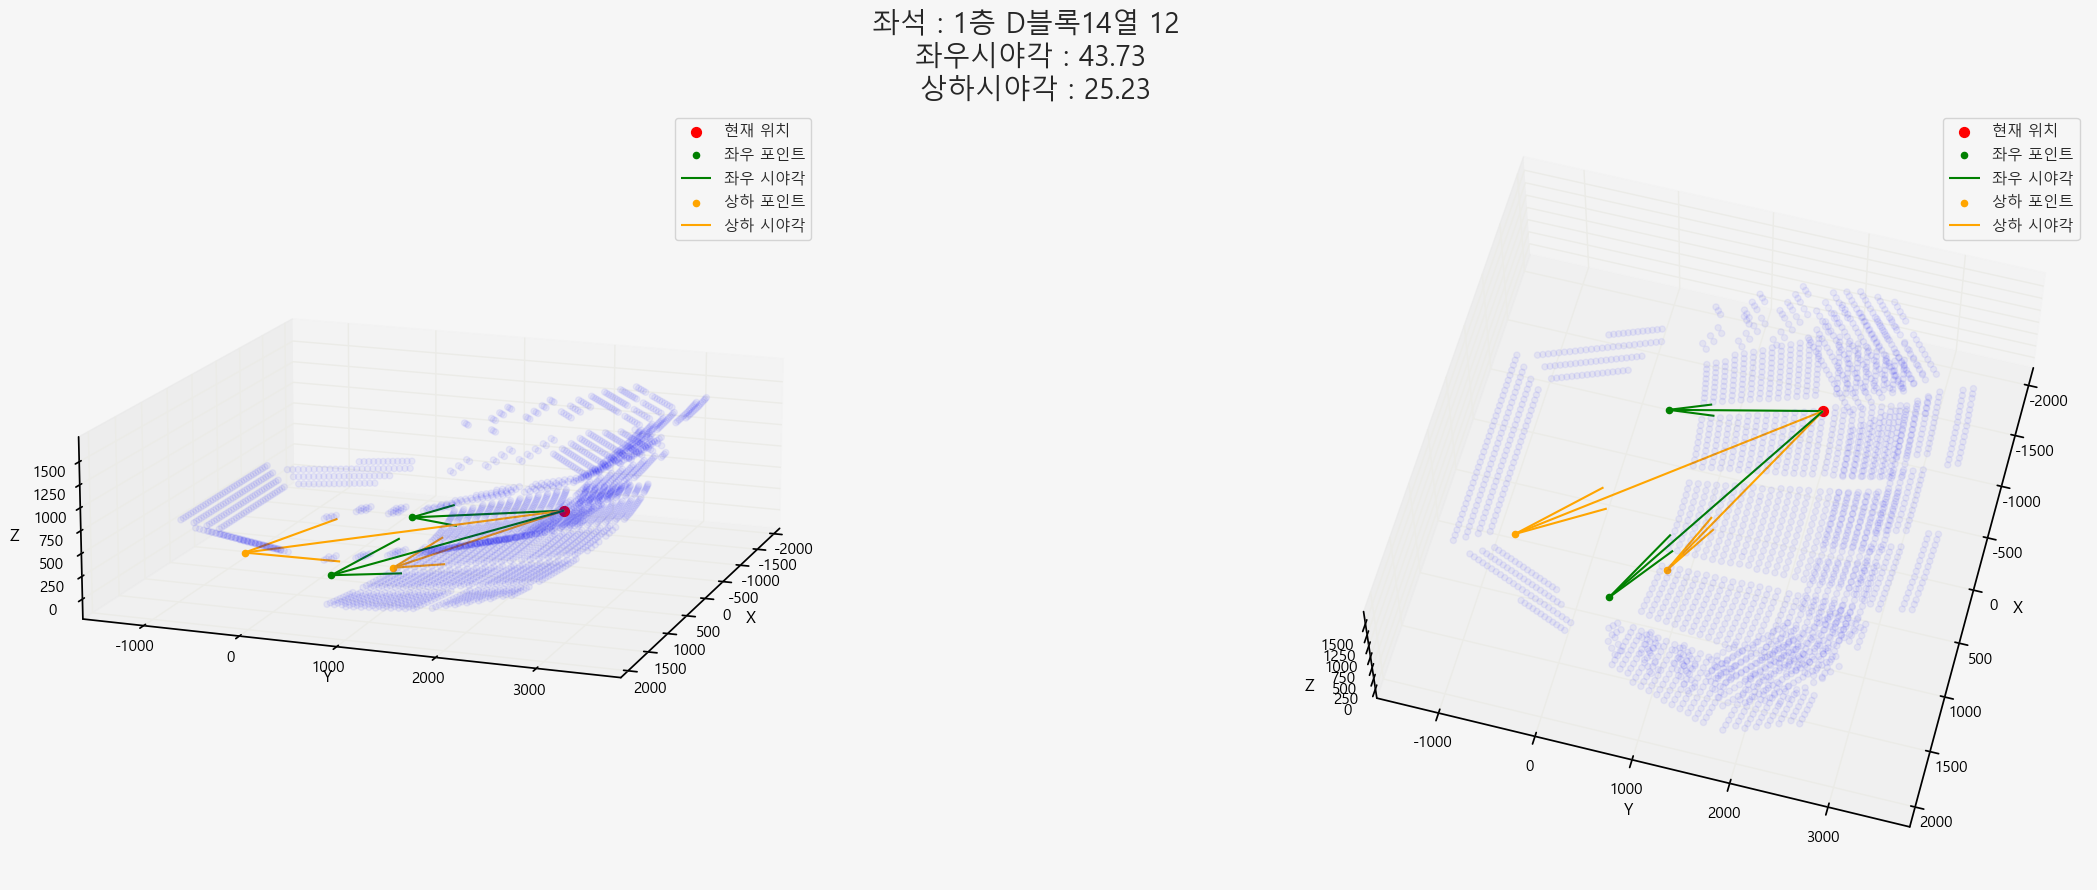

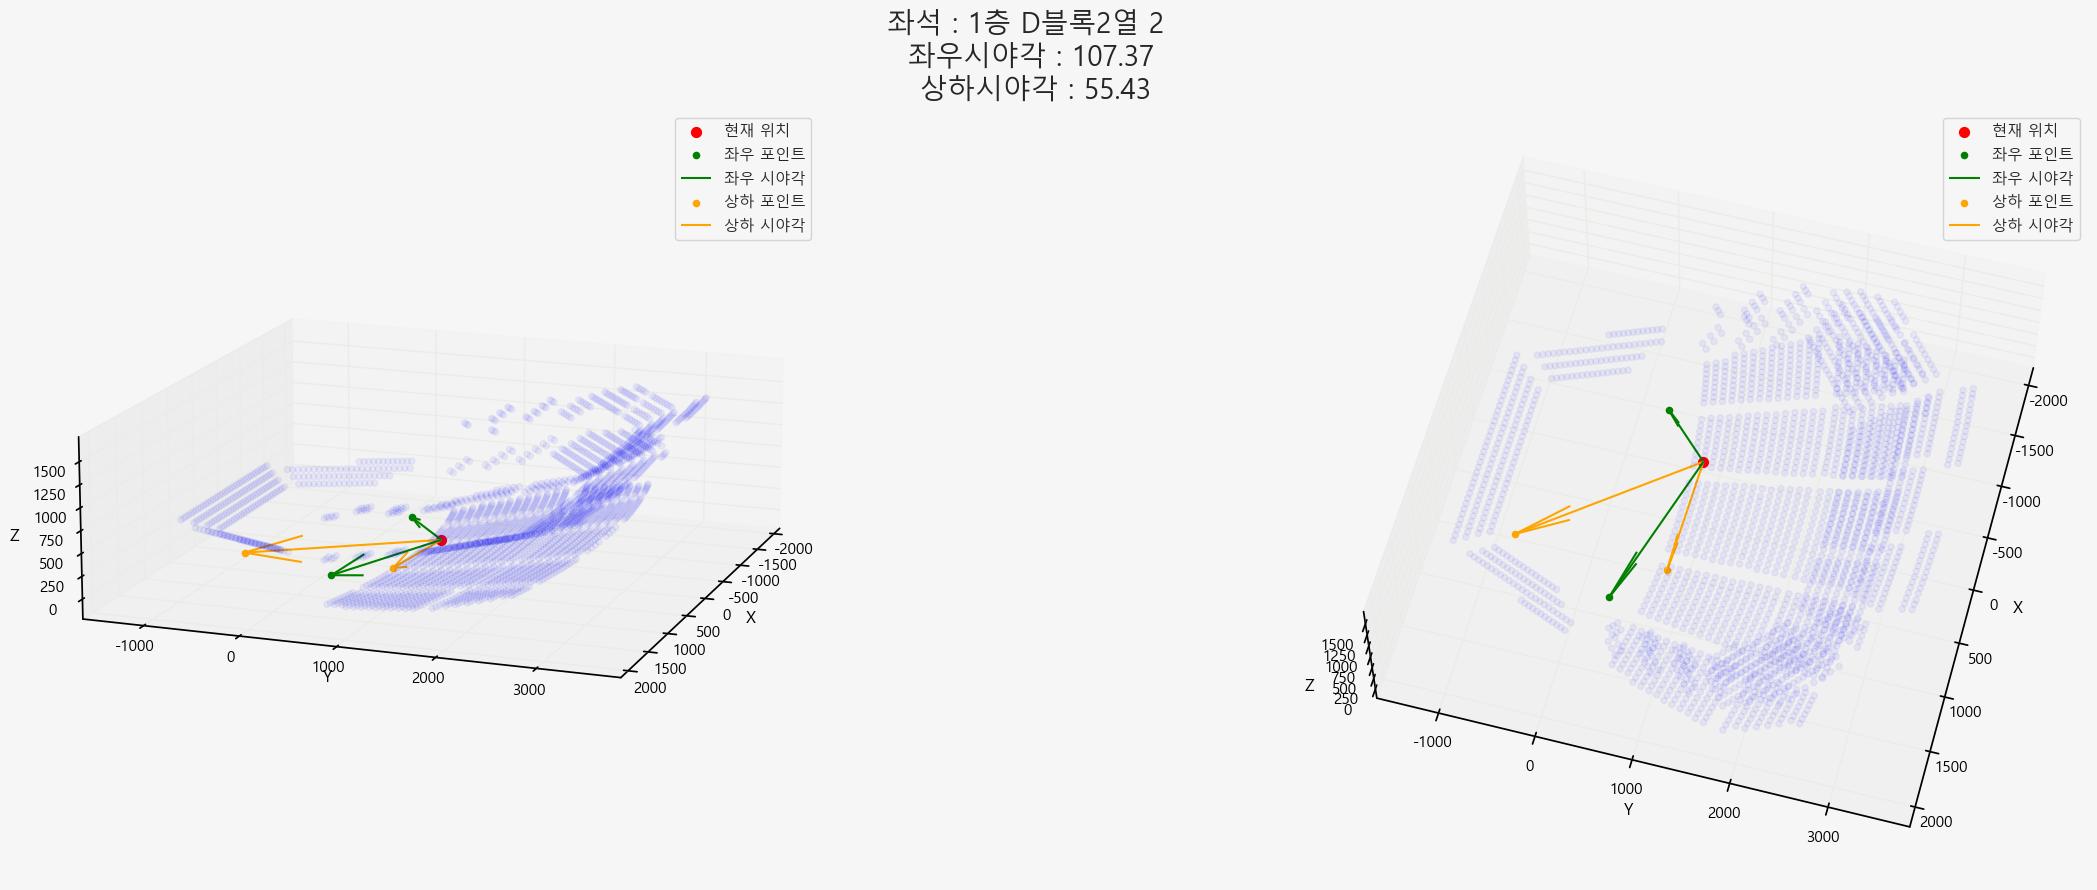

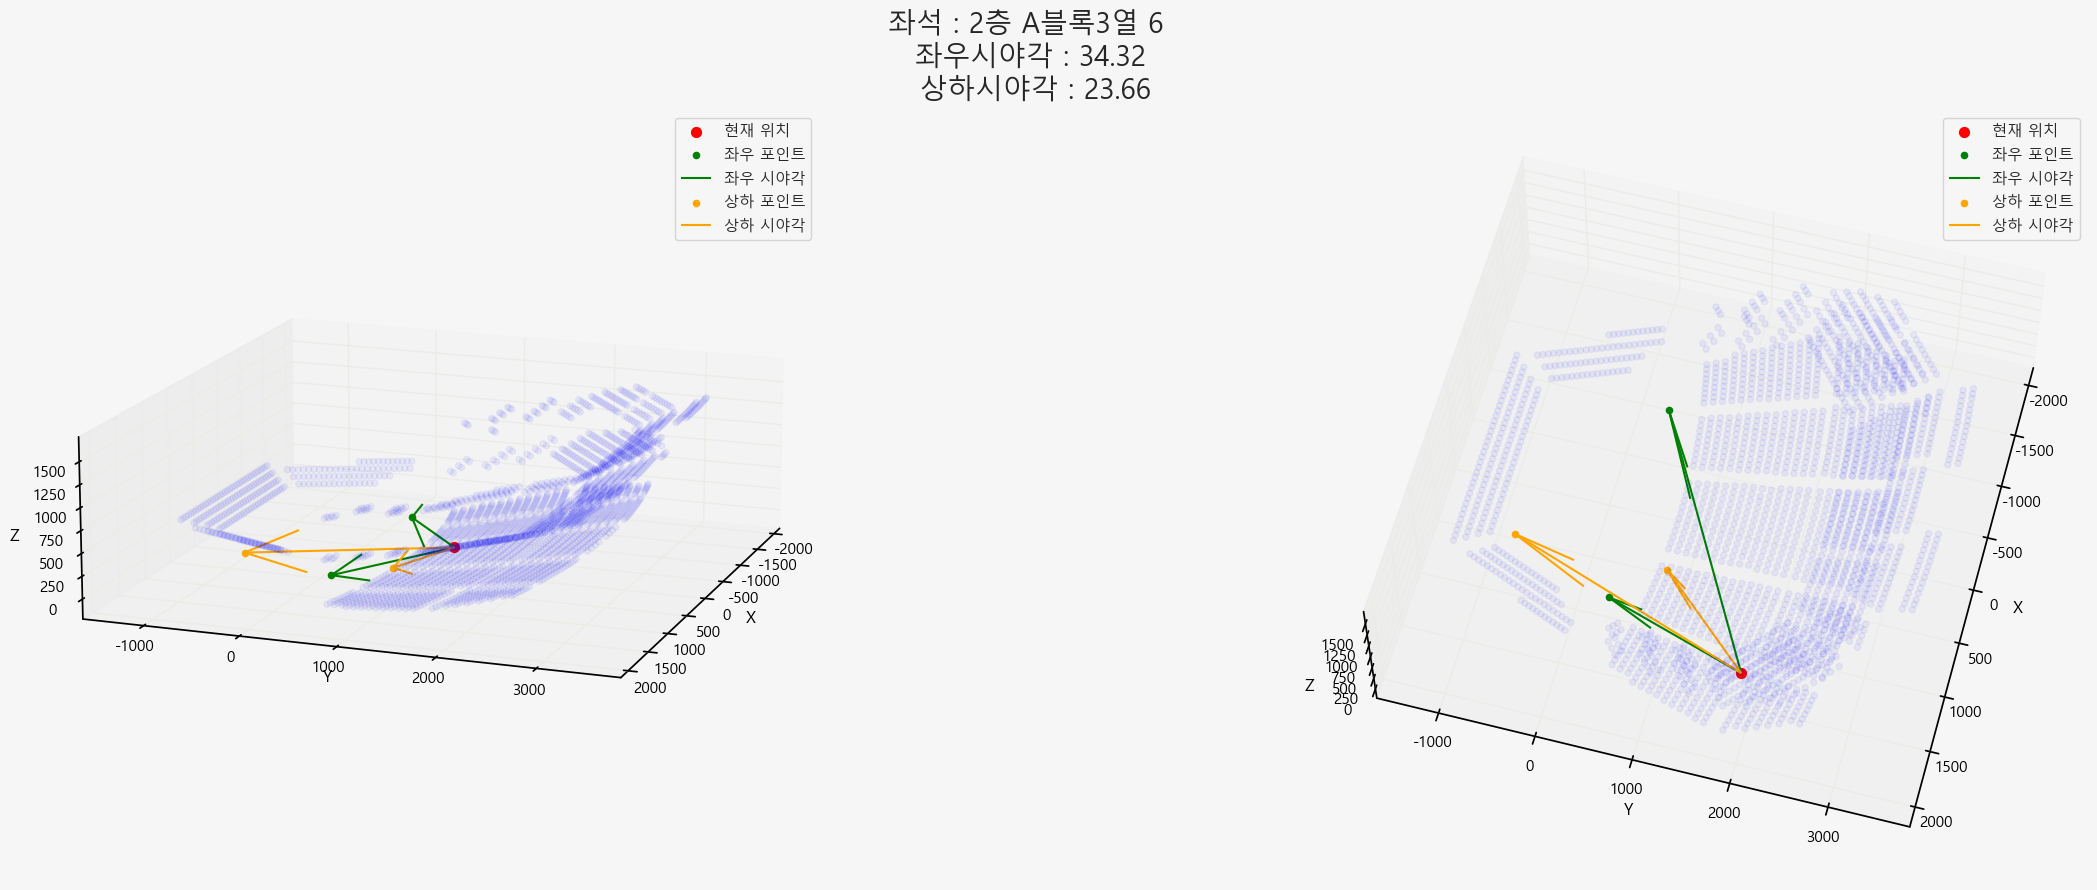

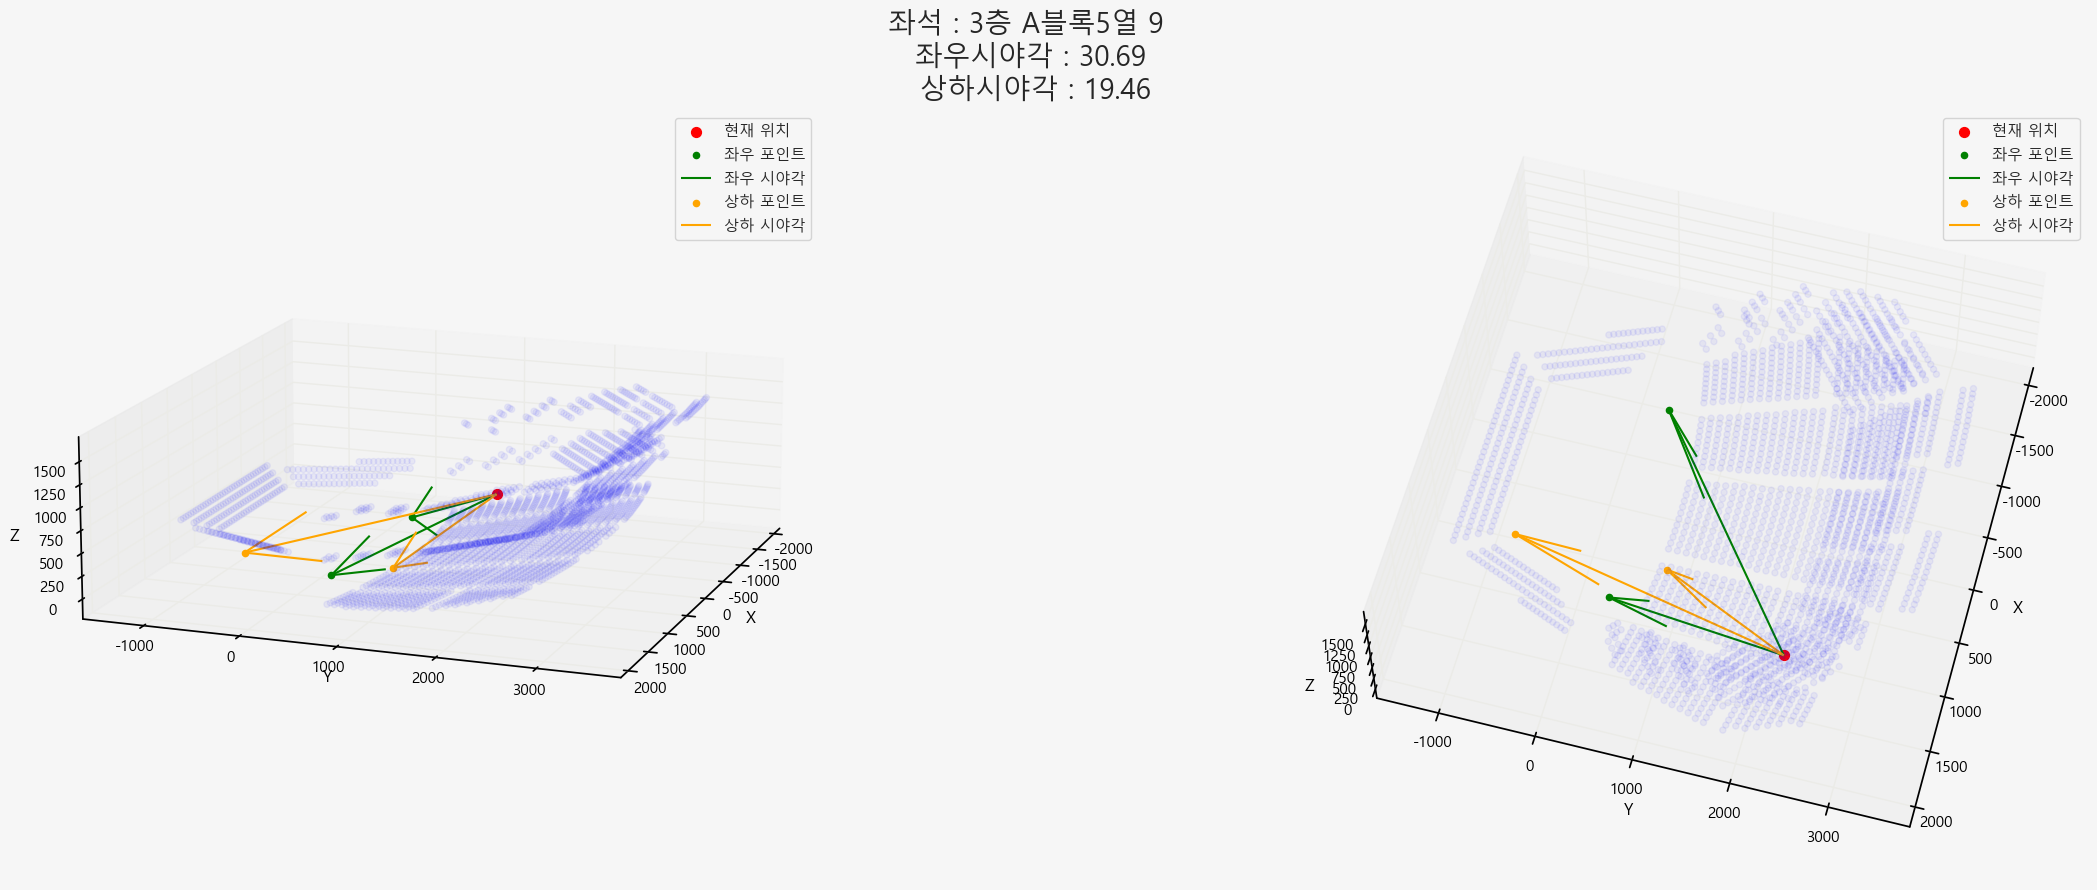

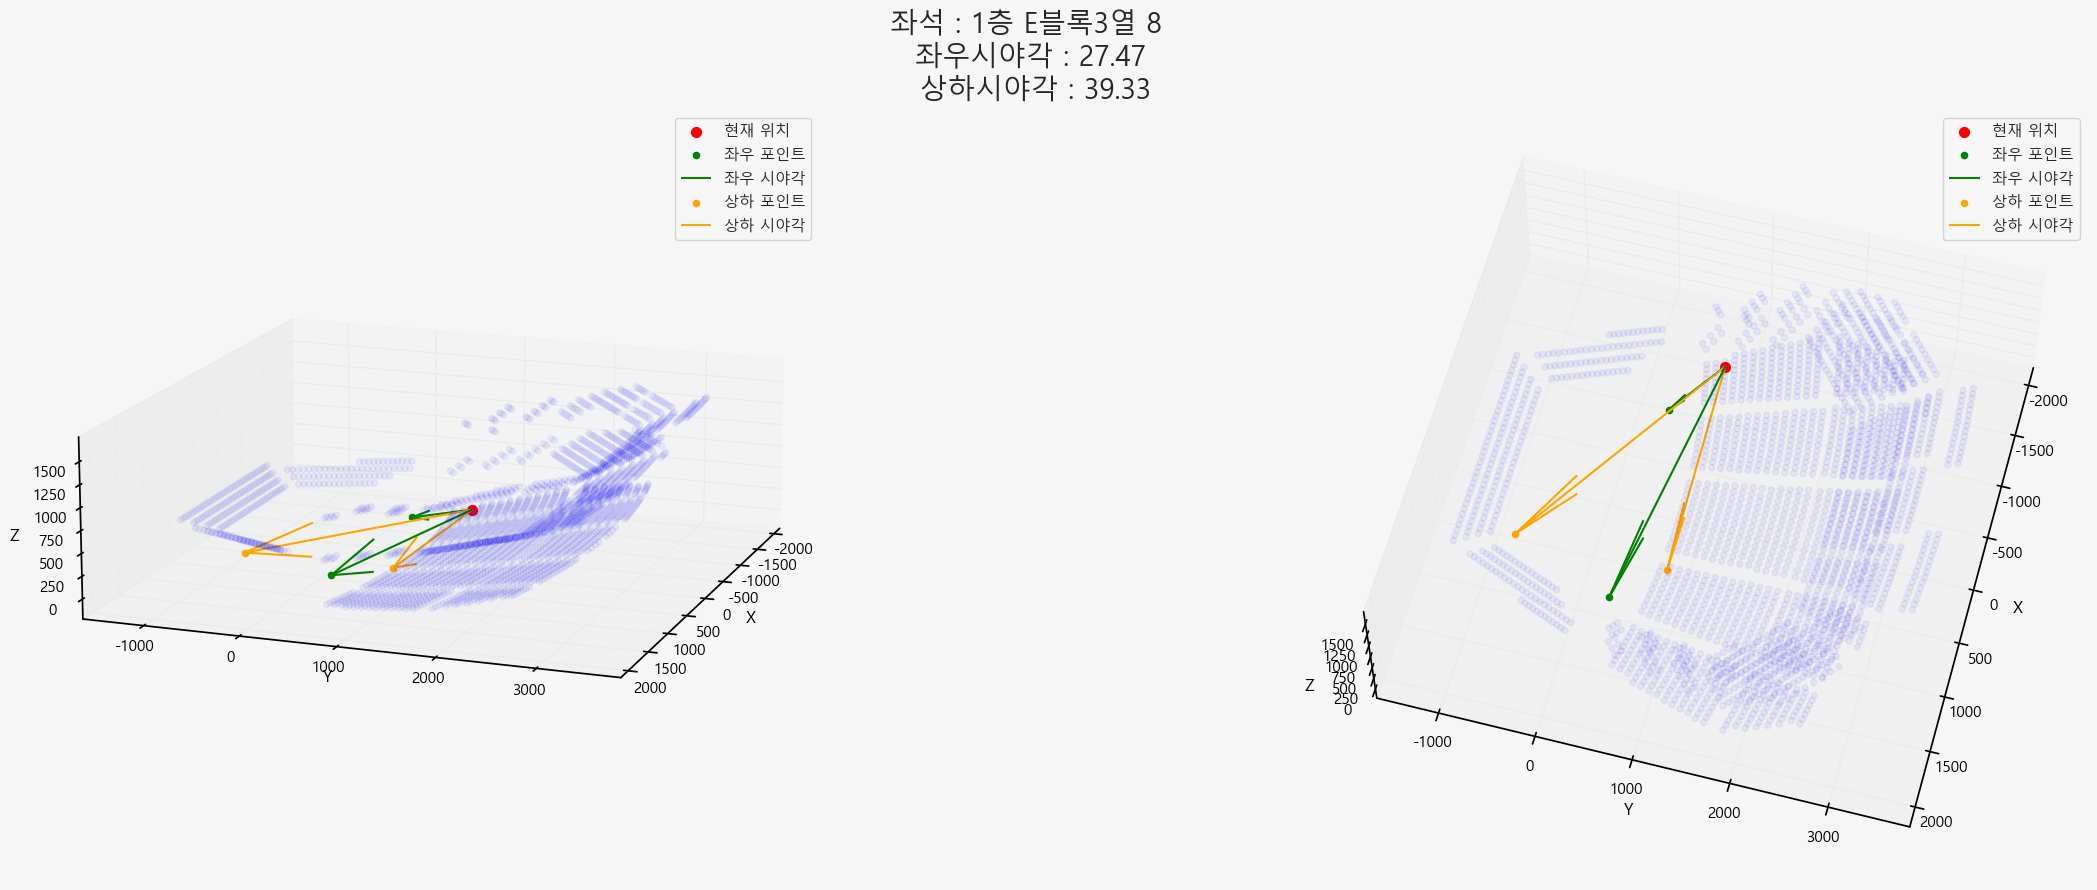

In [51]:
for example in example_seat_list:
    
    seat_angle_visualization(seat_information ,seat = example)    

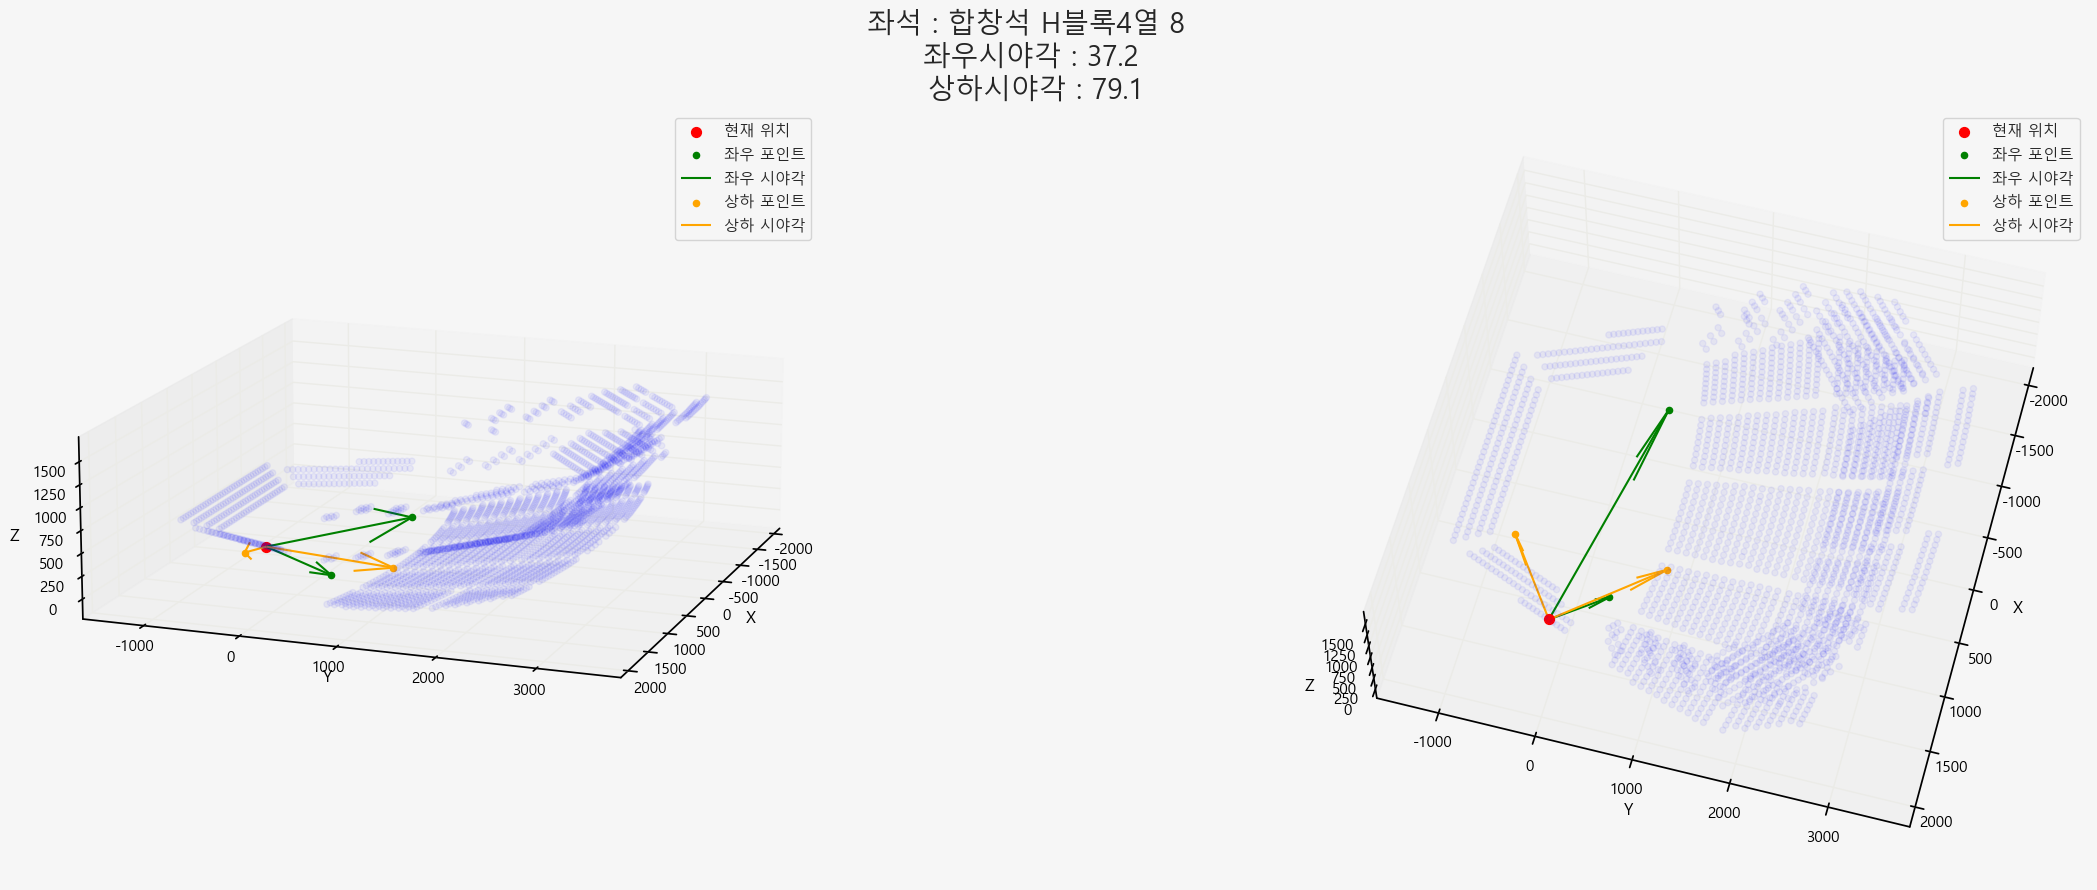

In [58]:
seat_angle_visualization(seat_information ,seat = '합창석 H블록4열 8')    